# Support Vector Machine(SVM)

Notebook orignially contributed by: [Avinash Kumar](https://github.com/Avinashshah099)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/Rishit-dagli/Python3-by-practice/blob/master/Machine%20Learning/sklearn%20examples/Support%20Vector%20Machines(SVM)/Support_Vector_Machine(SVM).ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Rishit-dagli/Python3-by-practice/blob/master/Machine%20Learning/sklearn%20examples/Support%20Vector%20Machines(SVM)/Support_Vector_Machine(SVM).ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

The following notebook uses Breast Cancer Wisconsin (Diagnostic) Data Set in order to determine whether to Predict whether the cancer is benign or malignant based on diagnostic measures. It is followed by a series of steps involving data visualisation and applying **Machine Learning Algorithm (Support Vector Machine(SVM))**.

**We use the <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data">Breast Cancer Wisconsin (Diagnostic) Data Set</a> Dataset originally contributed by <a href="https://archive.ics.uci.edu/ml/index.php">UCI Machine Learning</a>**

#Import Library

Importing required libraries for Machine Learning Alogorithm and visualizing.

In [1]:
#Import libraries with alias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#Getting the Data
The dataset used here is **breast_cancer_dataset.csv**.

The datasets consists of several medical predictor variables and one target variable **diagnosis**. Predictor variables includes the radius, texture, perimeter, area smoothness, compactness, concavity and so.



##Attribute Information:

1) ID number\
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)\
b) texture (standard deviation of gray-scale values)\
c) perimeter\
d) area\
e) smoothness (local variation in radius lengths)\
f) compactness (perimeter^2 / area - 1.0)\
g) concavity (severity of concave portions of the contour)\
h) concave points (number of concave portions of the contour)\
i) symmetry\
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [3]:
#load dataset
br_cancer = pd.read_csv("breast_cancer_dataset.csv")

In [4]:
br_cancer.head()  #list of top five index

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
br_cancer.shape

(569, 33)

In [11]:
#loading columns of given dataset
list(br_cancer.columns)

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [6]:
br_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
br_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [8]:
# let's find out how many 0 values are there in all columns

(br_cancer == 0).sum(axis=0)

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             13
concave points_mean        13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               13
concave points_se          13
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            13
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
Unnamed: 32                 0
dtype: int

In [9]:
#We will use 'median' to replace 0 for all columns

br_cancer["concavity_mean"].replace(0,br_cancer["concavity_mean"].median(), inplace=True)
br_cancer["concave points_mean"].replace(0,br_cancer["concave points_mean"].median(), inplace=True)
br_cancer["concavity_se"].replace(0,br_cancer["concavity_se"].median(), inplace=True)
br_cancer["concave points_se"].replace(0,br_cancer["concave points_se"].median(), inplace=True)
br_cancer["concavity_worst"].replace(0,br_cancer["concavity_worst"].median(), inplace=True)
br_cancer["concave points_worst"].replace(0,br_cancer["concave points_worst"].median(), inplace=True)


In [10]:
# let's check if all 0 values are replaced now

(br_cancer == 0).sum(axis=0)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Unnamed: 32                0
dtype: int64

#Exploratory Data Analysis(EDA)

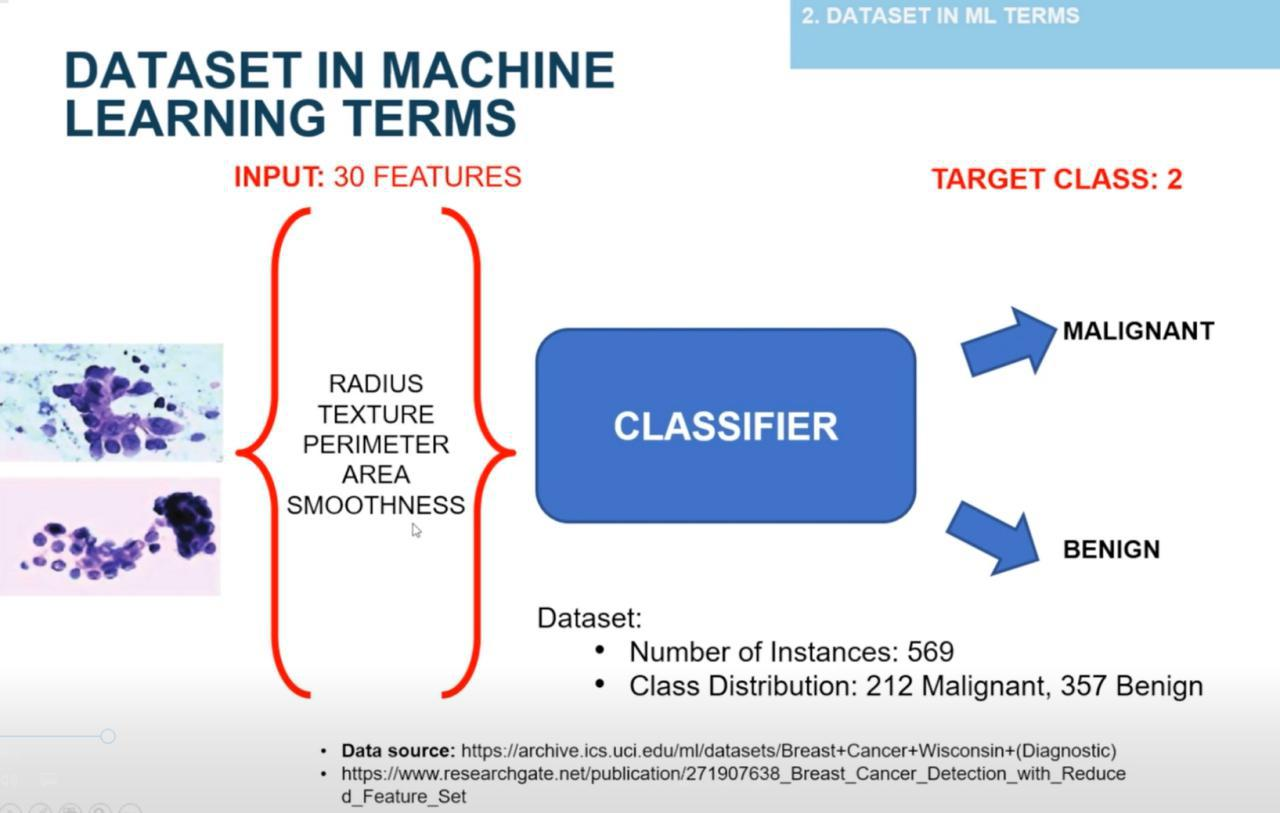

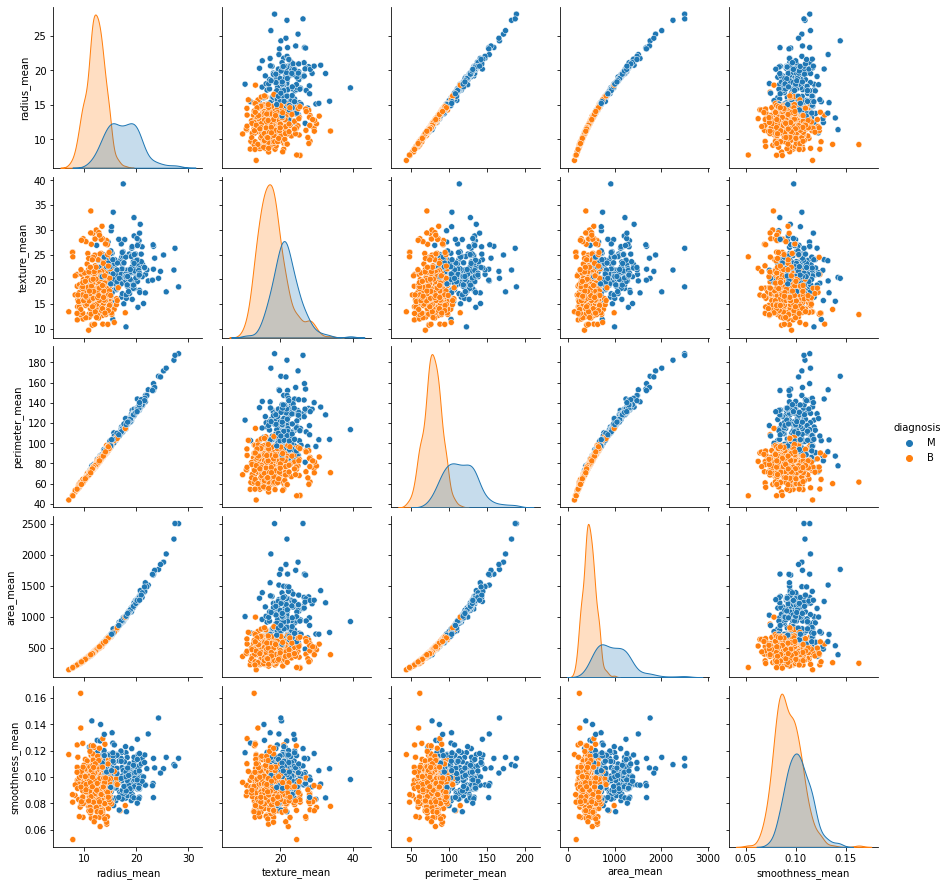

In [14]:
# when you specify through hue, it will show which part of the data is which class based on the target values
sns.pairplot(br_cancer, hue='diagnosis', vars = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean"])

We can easily see for area_mean, radius_mean and radius_mean features M, B classes have visibly different values
which is useful for classifiying two labels.

Note:\
Orange = Benign(B)\
Blue = Malignant(M)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


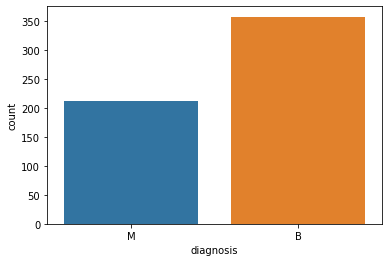

In [15]:
# let's plot a bar chart, for visuallizing the diagnosis
sns.countplot(br_cancer['diagnosis'])

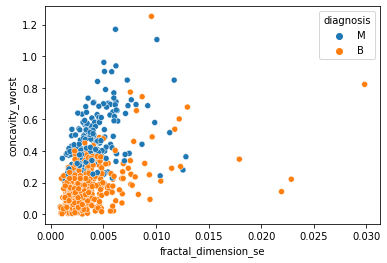

In [16]:
sns.scatterplot(x = 'fractal_dimension_se', y = 'concavity_worst', hue = 'diagnosis', data = br_cancer)

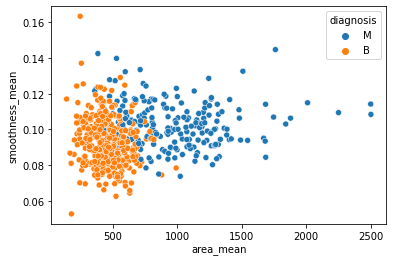

In [17]:
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = br_cancer)

In [20]:
br_cancer.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.046606,0.040262,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.051347,0.072539,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.017798,0.028126,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.661789,0.809618,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.170074,0.336501,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.503410,0.723288,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.311756,0.304428,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.151032,0.183878,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.314532,0.316895,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.701455,0.838292,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.204130,0.368413,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.540785,0.750846,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.675844,0.815661,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.188937,0.343636,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.495498,0.709772,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.514965,0.547451,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.236074,0.364910,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.423783,0.493435,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.875450,0.823493,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.556255,0.625458,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.804974,0.806466,0.510223,0.687382,NaN
concavity_mean,0.046606,0.661789,0.311756,0.701455,0.675844,0.514965,0.875450,1.000000,0.919220,0.504068,0.346802,0.636795,0.110437,0.663995,0.617917,0.116758,0.663616,0.682982,0.672493,0.201551,0.454093,0.675433,0.303590,0.716882,0.667709,0.439493,0.744521,0.880533,0.859330,0.405912,0.513487,NaN
concave points_mean,0.040262,0.809618,0.304428,0.838292,0.815661,0.547451,0.823493,0.919220,1.000000,0.466717,0.175982,0.705967,0.059120,0.716935,0.693383,0.047078,0.481294,0.422394,0.596342,0.120745,0.260647,0.819805,0.297426,0.845366,0.804027,0.443289,0.655822,0.742858,0.908021,0.372043,0.365635,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.504068,0.466717,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.343393,0.403442,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.437719,0.439572,0.699826,0.438413,NaN


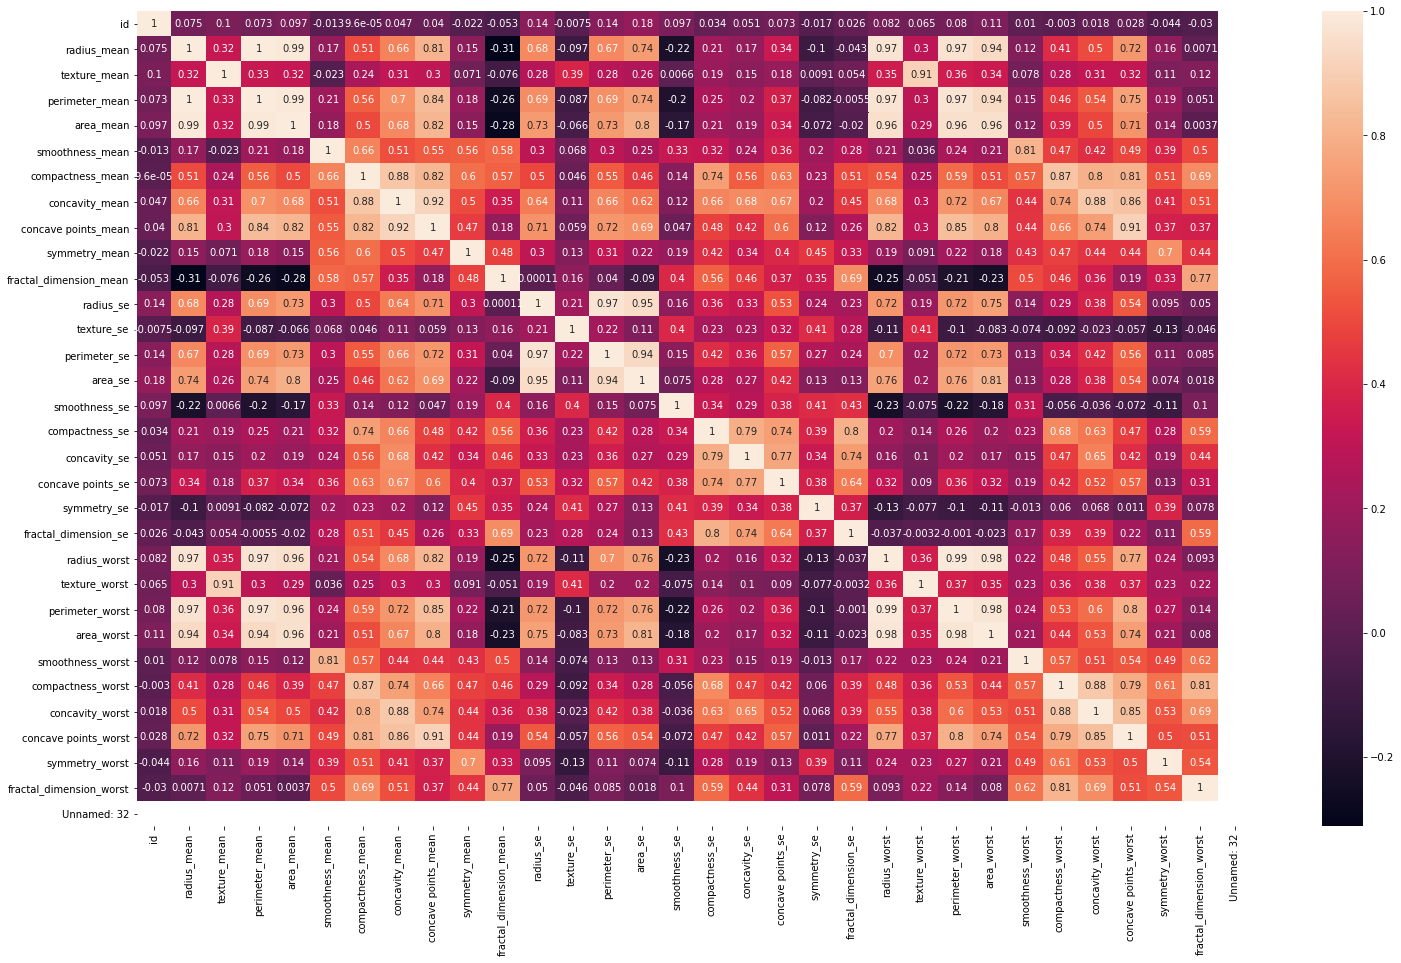

In [21]:
plt.figure(figsize=(25, 15))
sns.heatmap(br_cancer.corr(), annot= True)

# Classification Modeling: Support Vector Machine (SVM)

Support Vector Machine (SVM) is a binary linear classification whose decision boundary is explicitly constructed to minimize generalization error.

As well as, it is suited for complex classification.

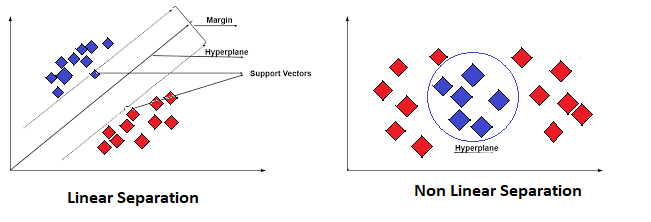

#Selecting Feature

Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [36]:
#split dataset in features and target variable
X = br_cancer.iloc[:, 2:-1] # Features
Y = br_cancer.iloc[:, 1] # Target variable

In [50]:
Y = [1 if i=='M' else 0 for i in Y]

#Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.


Let's split dataset by using function **train_test_split()**. You need to pass 3 parameters **features**, **target**, and **test_set size**. Additionally, you can use random_state to select records randomly.

In [51]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
# training and testing sets are divided in 80:20 ratio
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

Here, the Dataset is broken into two parts in a ratio of **80:20**. It means **80%** data will be used for model training and **20%** for model testing.

# Model Development and Prediction

First, import the **Support Vector machine** module and create a Support Vector machine classifier object using **SVC()** function.

Then, fit your model on the train set using **fit()** and perform prediction on the test set using **predict()**.

In [55]:
# import the class
from sklearn.svm import SVC 

# instantiate the model
classifier = SVC()

# fit the model with data
classifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
# predict the model  
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

#Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [66]:
# import the metrics class
from sklearn.metrics import classification_report, confusion_matrix
cm = metrics.confusion_matrix(y_test, y_predict)
confusion = pd.DataFrame(cm, index = ["is_cancer","is_healthy"],
                         columns = ["prediction_cancer","predicted_healthy"])
confusion

,prediction_cancer,predicted_healthy
is_cancer,60,7
is_healthy,0,47


#Visualizing Confusion Matrix using Heatmap

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.


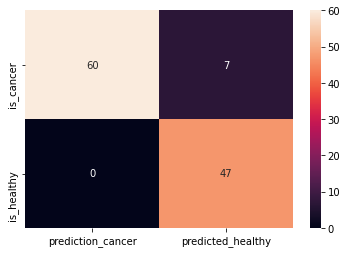

In [67]:
sns.heatmap(confusion, annot = True)

Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

In [68]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94        67
           1       0.87      1.00      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.94      0.94       114



 We achieved 95% accuracy!

#Conclusion
You have learned what the SVM is, how to build respective models, how to visualize results and also,improving the performance of an SVM model, and testing model accuracy using Confusion Matrix.